In [4]:
using PyCall

In [5]:
py"""
import numpy as np
from matplotlib import pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, Matern

np.random.seed(1)

def f(x):
    return x * np.sin(x)
    

def matern_data_1d():
    X = np.atleast_2d([1.,2., 3., 4.,5., 6., 7., 8.]).T
    y = f(X).ravel()
    kernel = 1.0 * Matern(length_scale=1.0, nu=1.5)
    gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
    gp.fit(X, y)
    x = np.atleast_2d(np.linspace(0, 10, 1000)).T
# Make the prediction on the meshed x-axis (ask for MSE as well)
    y_pred, sigma = gp.predict(x, return_std=True)
    return y_pred, sigma
"""
y_pred, sigma = py"matern_data_1d"()

([0.09496984470856162, 0.09936608612553233, 0.10380915862865514, 0.1082994521234042, 0.11283735943223228, 0.11742327631509397, 0.12205760149013489, 0.1267407366545159, 0.13147308650539014, 0.1362550587610194  …  6.442898745817233, 6.426111023511654, 6.409307642829447, 6.392489314847154, 6.375656743115979, 6.35881062372407, 6.341951645358343, 6.3250804893658135, 6.308197829814557, 6.2913043335540735], [2.1641277893444206, 2.1448263755797305, 2.1254522400882196, 2.1060056719501232, 2.086486972618738, 2.0668964561699776, 2.0472344495572257, 2.0275012928715235, 2.0076973396072546, 1.9878229569334613  …  3.604243225339443, 3.616715309155715, 3.629118935932997, 3.64145432489528, 3.653721696732377, 3.6659212735557873, 3.6780532788552636, 3.6901179374561464, 3.702115475477407, 3.7140461202903903])

In [6]:
using Plots, PyPlot, Random

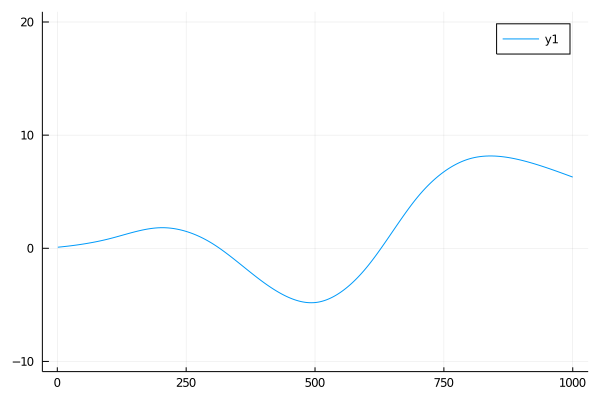

In [7]:
Plots.plot(y_pred, ylim=[-10,20])

In [13]:
include("../../src/Matern1D2D.jl")
using SparseArrays, LinearAlgebra

In [14]:
number_of_gridpoints = 1000
No_of_nodes_discarded = 900
random_permutation = randperm(MersenneTwister(1234), number_of_gridpoints)
discard = random_permutation[1:No_of_nodes_discarded]
# discard = rand(2:length(y_pred)-1, No_of_nodes_discarded);
# discard = unique(discard);
missing_data = copy(y_pred)
missing_data[discard].=-100
Plots.plot(missing_data, ylim=[-10,20])
len = length(y_pred)
h = 1e-2
nu = 1.5
length_scale = 1.0
dimension = 1

C = sparse(I, len, len)
for i in discard
    C[i,i] = 0;
end
f = C*y_pred;
#To do -- random permutation of 1000 and remove the first 90% of the data.
#Random permutation
#Set the seed for consistent result

In [15]:
m = dimension/2+nu
epsilon = sqrt(2*nu)/length_scale
restored_data_laplace, restored_data_matern = Matern_1D_Interpolation(len, h, discard, 
    m, epsilon, f)
# f = y_pred[:];
# u =((C-(Id -C)*A1D)) \ (C*f);
# restored_data_laplace = u;
# A = ∇²1d_Grid(len, h);
# epsilon = sqrt(2*nu)/length_scale
# sizeA = size(A,1);
# for i = 1:sizeA
#     A[i,i] = A[i,i] + epsilon^2
# end

# A2DM = A*A;
# u =((C-(Id -C)*A2DM)) \ (C*f);
# restored_data_matern = u

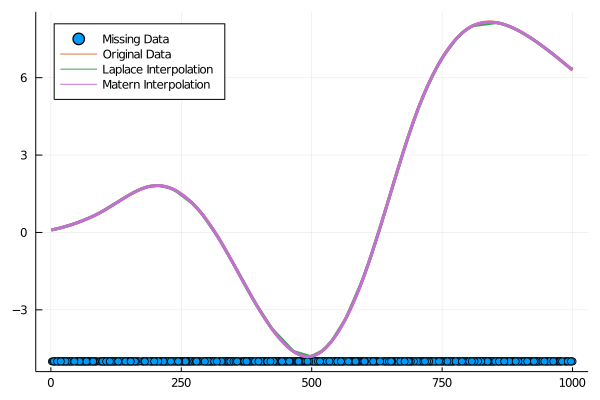

In [16]:

Plot_Matrix =[y_pred, restored_data_laplace, restored_data_matern]
#plot(y_pred, label="Original Data")
# #plot!(missing_data, title="Data with missing points");
# Plots.plot(restored_data_laplace, label="Laplace interpolated data");
# Plots.plot!(restored_data_matern, label="Matern, m = 2, eps = 0.1");
# #Plots.plot(plot1, plot2, plot3, plot4, layout = (2, 2), legend = false)
Plots.plot(discard, -5*ones(size(discard)), seriestype = :scatter, label = "Missing Data")
Plots.plot!(Plot_Matrix, labels=["Original Data" "Laplace Interpolation" "Matern Interpolation"], legend=:topleft, lw = 3)
#png("1D_MaternInterpolation.png")

In [131]:
error_laplace = abs.(restored_data_laplace - y_pred)./y_pred;
error_matern = abs.(restored_data_matern - y_pred)./y_pred;
Errors = [error_laplace, error_matern];

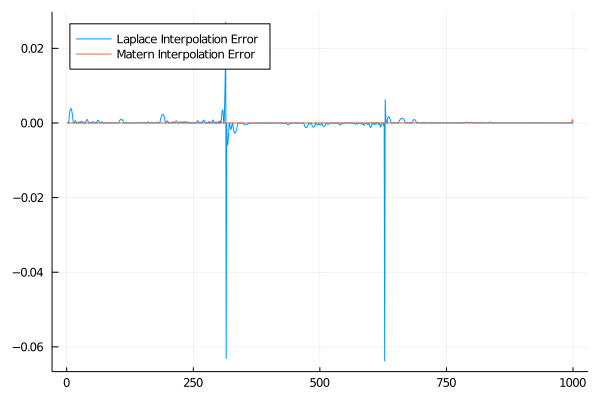

In [132]:
Plots.plot(Errors, labels=["Laplace Interpolation Error" "Matern Interpolation Error"], legend=:topleft)
#png("1D_InterpolationError.png")

In [113]:
print(error_matern)

[0.0, 0.0007248185388514239, 0.0, 0.0, 0.0, 1.0098880065534388e-10, 0.0, 1.489181122860117e-8, 2.2296441221092422e-8, 1.4830451894320973e-8, 0.0, 0.0, 2.230814014070326e-8, 3.9717423266916185e-8, 3.9078191960140174e-8, 2.1073523565062757e-8, 0.0, 3.553741523276699e-9, 9.086363828014754e-9, 6.898012466782788e-9, 0.0, 3.882028004609239e-9, 4.547321380554692e-9, 0.0, 0.0, 0.0, 0.0, 5.0329173328922394e-9, 4.927215191408152e-9, 0.0, 7.939823798430723e-10, 0.0, 0.0, 0.0, 4.230480021849559e-9, 4.2017685442097275e-9, 0.0, 0.0, 2.52646020770797e-9, 1.938021354508379e-9, 0.0, 5.5839955437342326e-9, 8.7287816974424e-9, 5.964892246801412e-9, 0.0, 5.95707982942173e-10, 7.075364738540202e-10, 0.0, 6.7556314986561006e-9, 1.1780548425655013e-8, 1.1520503329087717e-8, 6.304203326035207e-9, 0.0, 3.292693340206654e-10, 6.549017439461124e-10, 7.797194001568641e-10, 0.0, 3.42124106822439e-11, 0.0, 3.863548370119929e-11, 0.0, 0.0, 0.0, 1.6276202607912182e-10, 0.0, 3.2484581691250014e-10, 0.0, 0.0, 0.0, 0.0,